In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
##Read the dataset
df=pd.read_csv("SOCR-HeightWeight.csv")


In [3]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


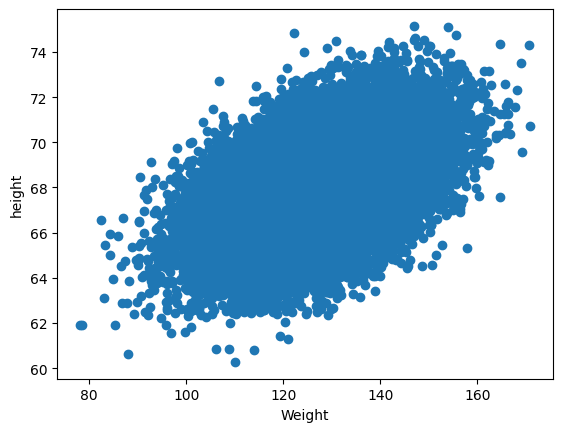

In [4]:
plt.scatter(df["Weight(Pounds)"],df["Height(Inches)"])
plt.xlabel("Weight")
plt.ylabel("height")
plt.show()


In [5]:
##divide our dataset into dependent and independent features
X=df[["Weight(Pounds)"]]
y=df["Height(Inches)"]

In [6]:
X.shape, y.shape

((25000, 1), (25000,))

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [9]:
df.shape

(25000, 3)

In [10]:
X_train.shape,X_test.shape

((20000, 1), (5000, 1))

In [11]:
y_train.shape,y_test.shape

((20000,), (5000,))

In [12]:
##standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

In [14]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

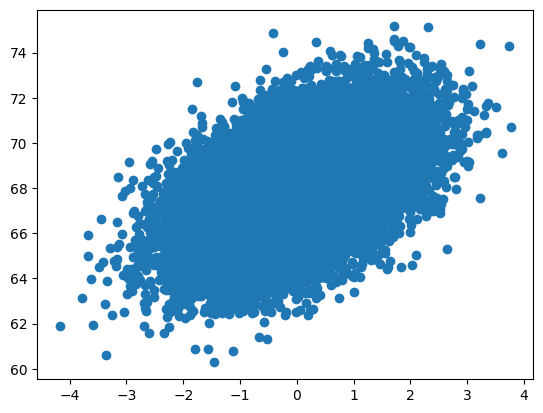

In [15]:
plt.scatter(X_train,y_train)

In [16]:
##Train the Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [17]:
regressor=LinearRegression()

In [18]:
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
regressor.coef_


array([0.95022131])

In [20]:
regressor.intercept_

np.float64(67.99034523350001)

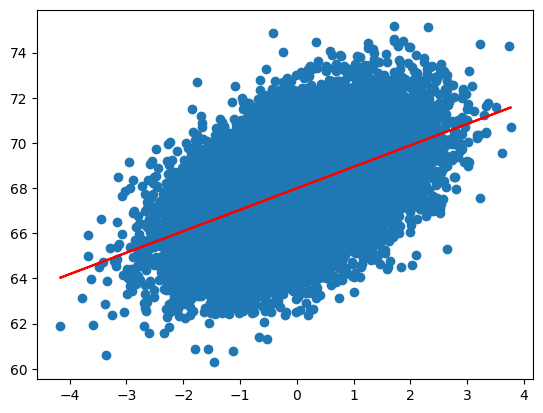

In [21]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [22]:
y_pred_test=regressor.predict(X_test)

In [23]:
y_pred_test

array([68.57909757, 66.75591741, 68.7180974 , ..., 69.14277554,
       68.19031301, 68.61726207])

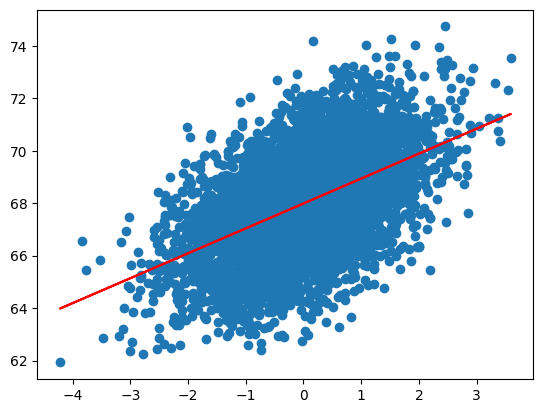

In [24]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

In [25]:
## performance metrics
## MSE,MAE,RMSE
## R square, Adjusted R square
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)


In [27]:
mse,mae

(np.float64(2.724962846065037), np.float64(1.316304056930067))

In [28]:
rmse=np.sqrt(mse)

In [29]:
rmse

np.float64(1.6507461482811452)

In [30]:
#R square
##  **R^2=SSR/SST
## R^2 coefficiant of determination
## SSR= sum of square of residuals
## SST= total sum of squares

In [31]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred_test)

In [32]:
r2

0.26055631630450127

In [33]:
## Adjusted R^2
1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.2604083683885958

In [34]:
regressor

LinearRegression()

In [37]:
## new data point weight is 80
scaled_weight=scaler.transform([[80]])

C:\Users\Roya\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
scaled_weight

array([[-4.04716941]])

In [39]:
regressor.predict([scaled_weight[0]])

array([64.1446386])

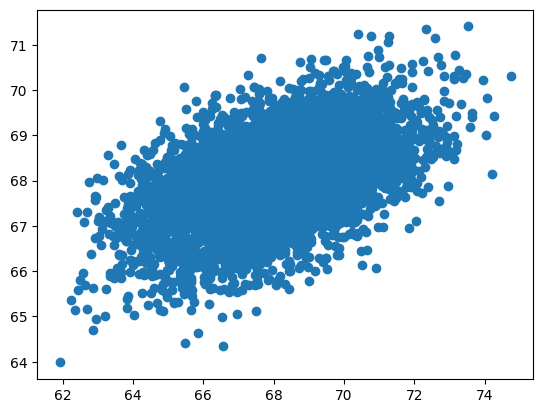

In [40]:
plt.scatter(y_test,y_pred_test)

In [41]:
##residuals
residual=y_test-y_pred_test

In [42]:
residual

6868    -0.154628
24016    1.140713
9668    -1.058877
13640    1.079658
14018    3.217371
           ...   
8670     0.046057
11839    1.080896
4013    -0.571796
21147   -1.094693
695      1.952528
Name: Height(Inches), Length: 5000, dtype: float64

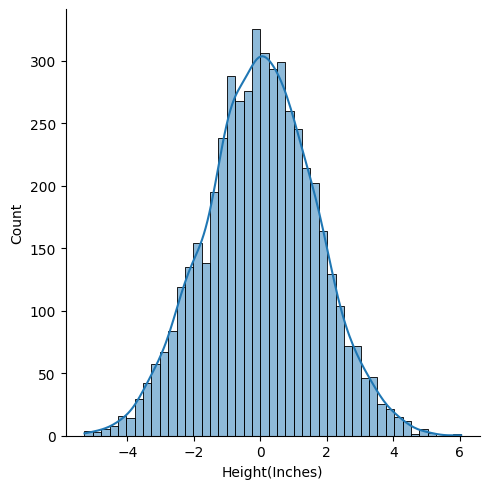

In [44]:
##plot this residual
import seaborn as sns
sns.displot(residual,kde=True)

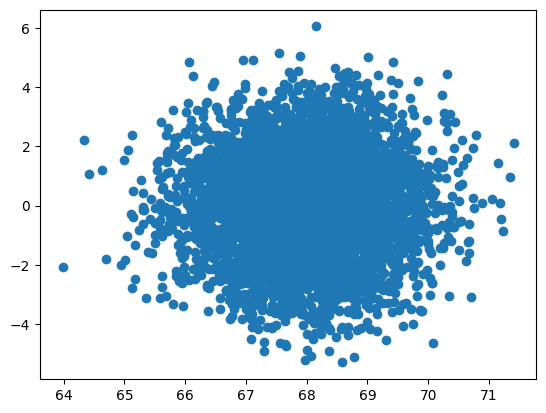

In [45]:
##scatter plot with prediction and residuals
plt.scatter(y_pred_test,residual)